# Digit Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, classification_report
import itertools

from tensorflow.keras.utils import to_categorical
import keras.models as models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

In [2]:
sns.set(style='white', context='notebook', palette='deep')

# exploring dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


# Preprocess data

In [8]:
Y_train = to_categorical(train['label'])
X_train = train.drop('label',axis = 1)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
X_train = X_train / 255.0
test = test / 255.0

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [13]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [14]:
X = np.concatenate([X_train, x_train,x_test])

In [15]:
Y = np.concatenate([Y_train,y_train, y_test])

In [16]:
X_train_, X_val, y_train_, y_val = train_test_split(X, Y, test_size=.1, random_state=42)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

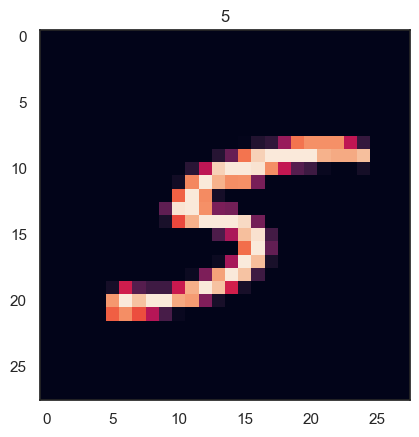

In [18]:
plt.imshow(x_train[523])
plt.title(np.argmax(y_train[523]));

# Baseline Model

In [19]:
# y_train.value_counts(normalize=True).max()
# np.max(np.argmax(y_train))

# Building Model

In [20]:
def model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [21]:
lr = .001
optimizers = {
    'SGD':SGD(learning_rate=lr, momentum=.9),
    'Adam':Adam(learning_rate=lr,beta_1=.9)
}

In [22]:
model = model()

In [23]:
model.compile(optimizer=optimizers['Adam'], loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,patience=2, min_lr=0.00000001)

datagen = ImageDataGenerator(
        rotation_range=15,
        zoom_range = 0.01,
        width_shift_range=0.1,
        height_shift_range=0.1)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)

In [ ]:
history = model.fit(it_train, epochs=50, validation_data=(X_val, y_val), verbose=1, callbacks=[reduce_lr])
model.save('dg6_adam_opt_aug_model.h5')

Epoch 1/50
938/938 [==============================] - 306s 324ms/step - loss: 0.3323 - accuracy: 0.8975 - val_loss: 0.0417 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 2/50
938/938 [==============================] - 323s 344ms/step - loss: 0.1023 - accuracy: 0.9692 - val_loss: 0.0339 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 3/50
938/938 [==============================] - 301s 320ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0277 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 4/50
938/938 [==============================] - 297s 316ms/step - loss: 0.0654 - accuracy: 0.9802 - val_loss: 0.0281 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 5/50
938/938 [==============================] - 275s 293ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0245 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 6/50
938/938 [==============================] - 277s 295ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0.0231 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 7/50
938/938 [==========================

In [ ]:
# evaluate model
_, acc = model.evaluate(X_val, y_val, verbose=1)
print('> %.3f' % (acc * 100.0))

In [ ]:
val_predict = model.predict(X_val,verbose =1)

In [ ]:
# y_val.iloc[0]

In [ ]:
# model = models.load_model('./dg1_adam_opt_model.h5')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = model.predict(X_val)

y_pred_classes = np.argmax(y_pred,axis = 1) 

y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

In [ ]:
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
predictions = model.predict(test)

predictions = np.argmax(predictions,axis = 1)

predictions = pd.Series(predictions,name="Label")

In [ ]:
ImageId = pd.read_csv('sample_submission.csv')['ImageId']

In [ ]:
df = pd.DataFrame({'ImageId':ImageId,'label':predictions})

In [ ]:
df.to_csv('submission_2_6.csv',index=False)